## Branching processes
Branching processes are a different discrete random process that for example describe the process of a growing population. Each individual could for example die with a certain rate, or split into two offspring. The branching process describes the number of individuals in the population. 
$$
\begin{split}
A &\rightarrow A + A \\
A &\rightarrow \emptyset 
\end{split}
$$
Many variations of such processes have been studied, including those with fixed generations (at fixed intervals in time all individuals in the population are replaced by offspring), or those with multiple interacting types. A key property of most branching processes is independence of the different "branches", that is each offspring is the start of a new branching process. 
This independence properties often allows for analytic calculations. 

### Extinction probability
One important quantity we often want to calculate the the probability that a branching process started with one individual goes extinct, that is leaves no offspring far out in the future. This quantity is particularly easy to calculate in a discrete generation branching process. In this case, the key to the solution boils down to **"a branch goes extinct, if it has no offspring, or all of its offspring go extinct"**. 
If the probability of having $n$ offspring is $p_n$, the extinction probability $P_0$ obeys
$$
P_0 = \sum_n p_n P_0^n
$$
if $p_n$ is Poisson with mean $1+s$, we find
$$
P_0 = e^{-(1+s)}\sum_n \frac{\left((1+s) P_0\right)^n}{n!} = e^{-(1+s)(1-P_0)}
$$
We can gain some insight into this transcendental equation by substituting the survival probability $P_s = 1 - P_0$ and expanding in small $P_s$.
$$
P_s = 1 - e^{-(1+s)P_s} = (1+s)P_s - \frac{(1+s)^2P_s^2}{2} + \cdots
$$
and hence $P_s \approx \frac{2s}{(1+s)^2}$
This immediately tells us that long term survival is only possible with $s>0$, i.e. with more than one offspring on average.


surived after 50 steps: 0.0964 
expected at infinite time: 0.091


Text(0, 0.5, 'number of individuals after 50 steps')

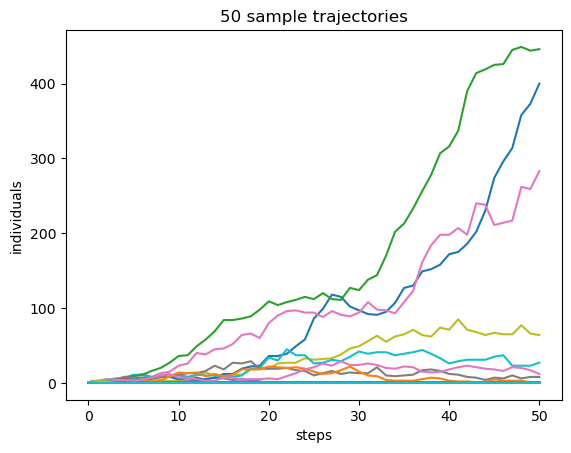

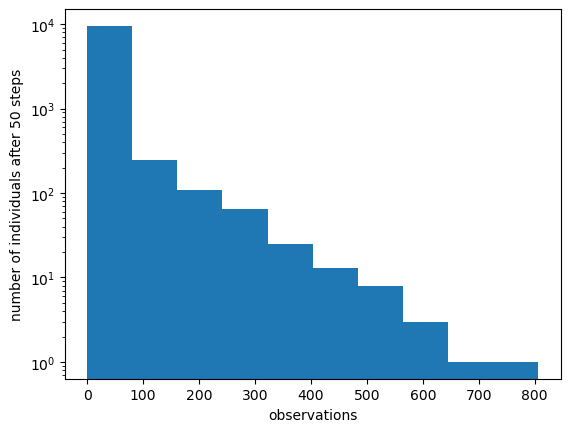

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# simulate branching processes
s = 0.05
n_samples = 10000
n_steps = 50

states = [np.ones(n_samples, dtype=int)]
for step in range(n_steps):
    states.append(np.random.poisson(states[-1]*(1+s)))

states = np.array(states)
print(f"surived after {n_steps} steps:", np.mean(states[-1]>0), f"\nexpected at infinite time: {2*s/(1+s)**2:1.3f}")

n_sample = 50
plt.title(f"{n_sample} sample trajectories")
plt.plot(states[:,:n_sample])
plt.xlabel('steps')
plt.ylabel('individuals')

plt.figure()
plt.hist(states[-1])
plt.yscale('log')
plt.xlabel('observations')
plt.ylabel(f"number of individuals after {n_steps} steps")


The distribution shown in the last graph shows a large peak close to $0$, which corresponds to the majority of trajectories that went extinct. The remainder of the distribution looks exponential (straight line on a log scale), but the binning makes this a bit hard to see. 

In such situations, it is often more informative to look at such data using cumulative histograms.

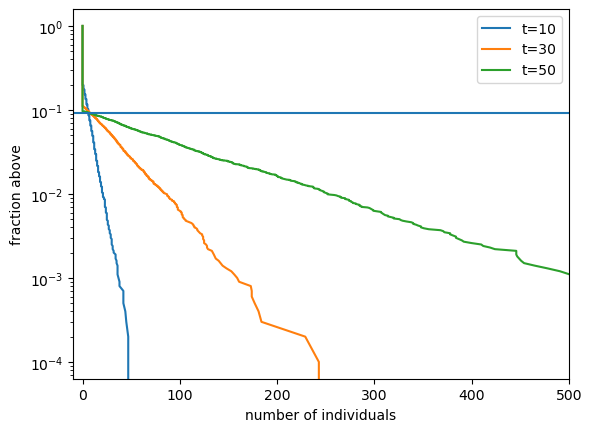

In [6]:
# sort the data and use them as x-axis, use an equally spaced array between 1 and 0 on the y-axis
# the resulting curve will show the fraction of the data that is above a certain value. 
for ti in [10,30,50]:
    plt.plot(sorted(states[ti]), np.linspace(1,0,n_samples), label=f't={ti}')
plt.yscale('log')
plt.xlim(-10,500)
plt.axhline(2*s/(1+s)**2)
plt.xlabel('number of individuals')
plt.ylabel('fraction above')
plt.legend()

The above graph confirms the impression that the distribution of individuals after some time is exponential, but with varying mean. Below, we will calculate the analytic form of this distribution. 

### Critical branching process
Let's consider a process in which individuals die and give birth with rate one.
This process is known as a continuous time critical branching process.
The probability to observe $n$ individual at time $t$ obeys the following difference equation:
$$
P(n, t+dt) = (1-2 n dt )P(n, t) + dt\left[ (n-1) P(n-1,t) + (n+1)P(n+1,t)\right]
$$
where the first term corresponds to the case when nothing is happening in the time interval $dt$, the second corresponds to division/birth and the third to the death of one individual with rate.
Taking the limit $dt\to 0$, we immediately get
$$
\partial_t P(n, t) = -2nP(n, t) + (n-1)P(n-1,t) + (n+1)P(n+1,t)
$$
To solve this equation, we define the generating function $\hat{p}(z,t) = \sum_n z^n P(n,t)$, multiply the equation by $z^n$ and sum over $n$:
$$
\begin{aligned}
\partial_t \hat{p}(z, t) &= -2z \partial_z \sum_{n=0} z^{n} P(n, t) + z^2 \partial_z \sum_{n=0} z^{n-1}P(n-1,t) + \partial_z \sum_{n=1} z^{n+1}P(n+1,t) \\
&= \left[-2z + z^2 + 1\right]\partial_z \hat{p}(z,t) = (z-1)^2 \; \partial_z \hat{p}(z,t)
\end{aligned}
$$
Instead of an infinite number of differential equations for $P(n,t)$, we are now looking at partial differential equation for the generating function.

### Side-note: Generating functions
Generating functions are a powerful concept to describe properties of a discrete probability distribuion $p_n$ via a continuous function $\hat{p}(z)$ of a complex variable $z$:
$$
\hat{p}(z) = \sum_n p_n z^n
$$
Generating functions have a number of very useful properties:
- evaluated at $z=0$, the reduce to $\hat{p}(0) = p_0$
- evaluated at $z=1$, we always get $\hat{p}(1) = \sum_n p_n = 1$
- differentiating them with respect to $z$, followed by evaluation at $z=1$ gives the mean $\partial_z \hat{p}(z)|_{z=1} = \sum_n n z^{n-1} p_n = \sum_n n p_n = \langle n\rangle$
- higher order moments can be expressed in terms of higher derivatives.
- the $p_n$ can be recovered via $p_n = \frac{\partial_z^n \hat{p}(z)|_{z=0}}{n!}$ (or corresponding contour integrals).

Sometimes, alternative definitions of the generation function are useful, for example $\hat{p}(z) = \sum_n e^{-nz} p_n$ or $\hat{p}(z) = \sum_n \frac{z^n}{n!} p_n$.


### Solution via the method of characteristics

We will consider here the initial condition $P(n,0)=\delta_{n0}$, i.e., there is exactly one individual at time $t=0$, and $\hat{p}(z,0) = z$ and solve this partial differential equation using the [method of characteristics](https://en.wikipedia.org/wiki/Method_of_characteristics).
The method of characteristics determines families of curves in the space of $(z,t)$ along which the function is constant.

In other words, we are looking for a function $z(t)$ -- the characteristic -- such $\hat{p}(z(t),t)$ is constant. This can be expressed as a vanishing **total derivative** of $\hat{p}(z(t), t)$:
$$
0 = \frac{d\hat{p}(z(t), t)}{dt} = \partial_z \hat{p}(z,t) \frac{dz}{dt} + \partial_t \hat{p}(z,t) = \partial_z \hat{p}(z,t) \left[\frac{dz}{dt} + (z-1)^2  \right]
$$
For this to be true, the term in brackets needs to vanish. This condition is the characteristic equation. 

#### Solving the characteristic equation

Substituting $z(t) = 1 - \chi(t)$, this equation simplifies to
$$
\frac{d \chi(t)}{dt} =  \chi(t)^2
$$
which has a finite time singularity.
$$
\chi(t) = \frac{1}{C - t}
$$
with initial condition $\chi(0) = C^{-1}$.
By construction, the generating function $\hat{p}(z,t)$ is constant along the characteristic curve such that $\hat{p}(z(t),t) = \hat{p}(z(0),0)) = z(0) = 1-C^{-1}$.
The problem is hence reduced to finding the integration constant $C$ such that the characteristic passes through the point $(z,t)$.
Solving
$$
z = 1 - \frac{1}{C(z,t)-t}
$$
for $C(z,t)$ yields
$$
% (1-z)^{-1} = C(z,t)-t
C(z,t) = (1-z)^{-1} + t
$$
This in turn results in the generating function
$$
\hat{p}(z,t) = 1 - \frac{1}{(1-z)^{-1} + t}
$$

#### Properties of the solution
As a sanity check, we can evaluate the first few moments
$$
1 = \sum_n P(n,t) = \hat{p}(1,t) = 1
$$
$$
\langle n\rangle = \sum_n n P(n,t) = \partial_z \hat{p}(z,t)|_{z=1} = 1
$$
and the survival probability
$$
1-P(0,t) = 1-\hat{p}(0,t) = \frac{1}{1+t}
$$

#### Inversion of the generating function
The generating function is 
$$
\hat{p}(z,t) = \sum_n p_n(t) z^n = 1 - \frac{(1-z)}{1 + t(1-z)} = 1 - \frac{1-z}{1+t}\frac{1}{1 - z t/(t+1)}
$$
The $p_n(t)$ are thus the coefficients of the power-series expansion of $\hat{p}(z,t)$ around $z=0$. Remembering that $\frac{1}{1-x} = 1 + x + x^2 + x^3 + \cdots$, we can expand the left hand side of the above to obtain an explicit solution.
$$
\begin{split}
\hat{p}(z,t) & = \sum_n p_n(t) z^n = 1 - \frac{1-z}{1+t}\sum_{n=0} z^n \frac{t^n}{(t+1)^n} \\
& = 1 - \frac{1}{1+t} + \frac{1}{1+t}\sum_{n=1} z^n \frac{t^{n-1}}{(t+1)^{n-1}}\left(1 - \frac{t}{t+1}\right) \\ 
& = \frac{t}{1+t} + \frac{1}{(1+t)^2}\sum_{n=1} z^n \frac{t^{n-1}}{(t+1)^{n-1}}
\end{split}
$$
Hence, we find
$$
p_n(t) = 
\begin{cases}
\frac{t}{1+t} & n=0\\
\frac{t^{n-1}}{(1+t)^{n+1}} & n>0
\end{cases}
$$
where $p_n(t)\approx e^{-n/t}/t^2$ for large $t$ and $n>0$.

### Solution via the first step (backward) equation 
While the way we derived the generating function above was straightforward, it did require solving a (simple) PDE.
A more direct way to the solution is via a first step equation.
In analogy to our derivation of the backward equation for stochastic processes, we split the time interval $[\tau,t]$ into a short first step $[\tau,\tau + \Delta t]$ and the remainder $[\tau + \Delta t, t]$, and assuming we start with a single individual at time $\tau$, we have
$$
P(n,t|\tau) = (1-2\Delta t)P(n,t| \tau + \Delta t) + \Delta t \left[\delta(n=0) + \sum_{n'=0}^n P(n',t|\tau + \Delta t)P(n-n',t|\tau + \Delta t)\right]
$$
The terms in this equations have the following interpretation, in terms of events that could happen in the first short $[\tau, \tau + \Delta t]$ time interval:
- the first term corresponds to the case where nothing happens in this time interval, and the population grows from 1 to $n$ in the remaining time.
- the second term corresponds to the death of the one and only individual (and pins the distribution at $n=0$)
- the last term corresponds to a birth event that splits the population in two ancestors. The sum runs over the different ways in which these two ancestors can generate in total $n$ descendants in the remaining time.

For small time intervals $\Delta t$, this equation is readily turned into an ODE
$$
-\frac{dP(n,t|\tau)}{d\tau} = -2 P(n,t|\tau) + \delta(n=0) + \sum_{n'=0}^n P(n',t|\tau)P(n-n',t|\tau)
$$
and the convolution can be disentangled by Laplace-transformation, that is considering the generating function $\hat{p}(z,t|\tau)\\ = \sum_n z^n P(n,t|\tau)$.
The Laplace transform turns the convolution into a product:
$$
-\frac{d\hat{p}(z,t|\tau)}{d\tau} = -2 \hat{p}(z,t|\tau) + 1 + \sum_{n}\sum_{n'=0}^n z^{n'}P(n',t|\tau)z^{n-n'}P(n-n',t|\tau) = 2\hat{p}(z,t|\tau) + 1 + \hat{p}(z,t|\tau)^2
$$
(Note that $\sum_{n=0}^\infty \sum_{n'=0}^{n} = \sum_{n'=0}^\infty \sum_{n=n'}^{\infty} $).
This can be further simplified by substituting $\hat{p}(z,t|\tau) = 1-\phi(z,t|\tau)$:
$$
-\frac{d\phi(z,t|\tau)}{d\tau} = 2 (1-\phi) - 1 - (1-\phi))^2 = -\phi^2
$$
with solution $\phi(z,t|\tau) = \frac{1}{(1-z)^{-1}+(t-\tau)}$,
where the integration constant was used to fulfill the initial condition $\phi(z,\tau|\tau)=1-z$.
If we consider cases that are time invariant, the distribution $p(n,t|\tau)$ does not depend on $t$ and $\tau$ separately, but only on $t-\tau$. In that case, we can set $\tau=0$ and drop the extra argument.

Note the close correspondence of the equations using this approach and the approach using the method of characteristics.  




# General time dependent birth and death rates
Let's consider a process in which individuals die and give birth at rates $\alpha(t)$ and $\beta(t)$, respectively.
We could solve this problem via a forward equation with the method of characteristics.
But it is a lot easier using a first step equation approach.
Starting with one individual at $\tau$, we can express $p(n,t|1,\tau)$ as
$$
\begin{split}
p(n,t|\tau)  = & (1-\Delta t (\alpha(\tau)+\beta(\tau)))p(n,t|\tau+\Delta t) \\ &+ \Delta t \left[\beta(\tau)\delta(n=0) + \alpha(\tau)\sum_{n'=0}^n p(n',t|\tau)p(n-n',t|\tau)\right]
\end{split}
$$
This difference equation corresponds to the ODE
$$
-\frac{d p(n,t|\tau)}{d\tau} = -(\alpha(\tau)+\beta(\tau))p(n,t|\tau) + \beta(\tau)\delta(n=0) + \alpha(\tau)\sum_{n'=0}^n p(n',t|\tau)p(n-n',t|\tau)
$$
Note that the sign of the time derivative is different since the derivative is with respect to the starting time.
As before, we use the Laplace transform $\phi(z,t|\tau) = \sum_n z^n p(n,t|\tau)$ to obtain
$$
-\frac{d \hat{p}(z,t|\tau)}{d\tau} = -(\alpha(\tau)+\beta(\tau))\hat{p}(z,t|\tau) + \beta(\tau) + \alpha(\tau)\hat{p}(z,t|\tau)^2
$$
Furthermore, we substitute $\phi(z,t|\tau) = 1 - \hat{p}(z,t|\tau)$
$$
\frac{d \phi(z,t|\tau)}{d\tau} = -(\alpha(\tau)+\beta(\tau))(1-\phi(z,t|\tau)) + \beta(\tau) + \alpha(\tau)(1-\phi(z,t|\tau))^2
$$
$$
\frac{d \phi(z,t|\tau)}{d\tau} = -(\alpha(\tau)-\beta(\tau))\phi(z,t|\tau) + \alpha(\tau)\phi(z,t|\tau)^2
$$
This equation can be integrated (using $s(t) = \alpha(t)-\beta(t)$)
$$
\phi(z,t|\tau) = \frac{e^{\int_\tau^{t} s(t')}}{C + \int_\tau^t \alpha(t') e^{\int_{t'}^{t} s(t')}dt'}
$$
At the initial time $\tau=t$ we need $\phi(z,\tau|\tau) = 1-z$ and hence the integration constant is
$$
C = (1-z)^{-1}
$$

### Sanity check: moments
The normalization of the probability distribution requires that $\phi(z=1)$ vanishes at all times.
Our solution has this property since $C$ diverges in this case.
Similarly, the derivative wrt to $z$ evaluated at $z=1$ should evaluate to the mean number of descendants: